In [170]:
import nltk

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import collections
import re
import random
import scipy.io
import glob

In [172]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from sklearn import preprocessing
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics # Additional sklearn function
from sklearn.model_selection import cross_val_score,GridSearchCV # performing grid search
from sklearn.feature_selection import SelectKBest
from sklearn.naive_bayes import BernoulliNB

In [173]:
from nltk import PorterStemmer  # Text processing

In [174]:
from nltk import PorterStemmer #Text processing
import pickle
pd.set_option('display.max_columns',None)

In [175]:
# Load the dictionary containing the dataset
pickle_in = open("Enron/data/Enron.pkl.txt",'rb')
data_dict = pickle.load(pickle_in)

In [176]:
df = pd.DataFrame.from_dict(data_dict,orient='index')
df.replace('NaN',np.nan,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 21 columns):
salary                       95 non-null float64
to_messages                  86 non-null float64
deferral_payments            39 non-null float64
total_payments               125 non-null float64
loan_advances                4 non-null float64
bonus                        82 non-null float64
email_address                111 non-null object
restricted_stock_deferred    18 non-null float64
deferred_income              49 non-null float64
total_stock_value            126 non-null float64
expenses                     95 non-null float64
from_poi_to_this_person      86 non-null float64
exercised_stock_options      102 non-null float64
from_messages                86 non-null float64
other                        93 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          146 non-null bool
long_term_incentive          66 non-null float

In [177]:
df.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788.0,807.0,NaN,1061827.0,NaN,600000.0,mark.metts@enron.com,NaN,NaN,585062.0,94299.0,38.0,NaN,29.0,1740.0,1.0,False,NaN,702.0,585062.0,NaN
BAXTER JOHN C,267102.0,NaN,1295738.0,5634343.0,NaN,1200000.0,NaN,NaN,-1386055.0,10623258.0,11200.0,NaN,6680544.0,NaN,2660303.0,NaN,False,1586055.0,NaN,3942714.0,NaN
ELLIOTT STEVEN,170941.0,NaN,NaN,211725.0,NaN,350000.0,steven.elliott@enron.com,NaN,-400729.0,6678735.0,78552.0,NaN,4890344.0,NaN,12961.0,NaN,False,NaN,NaN,1788391.0,NaN
CORDES WILLIAM R,NaN,764.0,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185.0,NaN,10.0,651850.0,12.0,NaN,0.0,False,NaN,58.0,386335.0,NaN
HANNON KEVIN P,243293.0,1045.0,NaN,288682.0,NaN,1500000.0,kevin.hannon@enron.com,NaN,-3117011.0,6391065.0,34039.0,32.0,5538001.0,32.0,11350.0,21.0,True,1617011.0,1035.0,853064.0,NaN


In [178]:
df.tail()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
GRAMM WENDY L,NaN,NaN,NaN,119292.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,119292.0
CAUSEY RICHARD A,415189.0,1892.0,NaN,1868758.0,NaN,1000000.0,richard.causey@enron.com,NaN,-235000.0,2502063.0,30674.0,58.0,NaN,49.0,307895.0,12.0,True,350000.0,1585.0,2502063.0,NaN
TAYLOR MITCHELL S,265214.0,533.0,227449.0,1092663.0,NaN,600000.0,mitchell.taylor@enron.com,NaN,NaN,3745048.0,NaN,0.0,3181250.0,29.0,NaN,0.0,False,NaN,300.0,563798.0,NaN
DONAHUE JR JEFFREY M,278601.0,865.0,NaN,875760.0,NaN,800000.0,jeff.donahue@enron.com,NaN,-300000.0,1080988.0,96268.0,188.0,765920.0,22.0,891.0,11.0,False,NaN,772.0,315068.0,NaN
GLISAN JR BEN F,274975.0,873.0,NaN,1272284.0,NaN,600000.0,ben.glisan@enron.com,NaN,NaN,778546.0,125978.0,52.0,384728.0,16.0,200308.0,6.0,True,71023.0,874.0,393818.0,NaN


In [179]:
df.isna().describe()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
count,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2
top,False,False,True,False,True,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True
freq,95,86,107,125,142,82,111,128,97,126,95,86,102,86,93,86,146,80,86,110,129


In [180]:
df.isna().sum()

salary                        51
to_messages                   60
deferral_payments            107
total_payments                21
loan_advances                142
bonus                         64
email_address                 35
restricted_stock_deferred    128
deferred_income               97
total_stock_value             20
expenses                      51
from_poi_to_this_person       60
exercised_stock_options       44
from_messages                 60
other                         53
from_this_person_to_poi       60
poi                            0
long_term_incentive           80
shared_receipt_with_poi       60
restricted_stock              36
director_fees                129
dtype: int64

In [181]:
df.columns

Index(['salary', 'to_messages', 'deferral_payments', 'total_payments',
       'loan_advances', 'bonus', 'email_address', 'restricted_stock_deferred',
       'deferred_income', 'total_stock_value', 'expenses',
       'from_poi_to_this_person', 'exercised_stock_options', 'from_messages',
       'other', 'from_this_person_to_poi', 'poi', 'long_term_incentive',
       'shared_receipt_with_poi', 'restricted_stock', 'director_fees'],
      dtype='object')

In [182]:
df.shape

(146, 21)

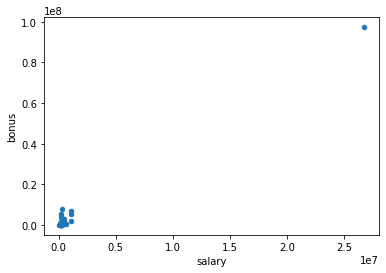

In [183]:
df.plot.scatter(x='salary', y='bonus')

In [184]:
df['salary'].idxmax()

'TOTAL'

In [185]:
len(df[df['poi']])

18

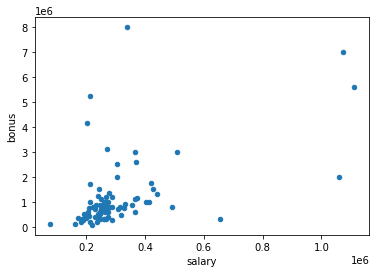

In [186]:
df.drop('TOTAL',inplace=True)
df.plot.scatter(x='salary',y='bonus')

In [187]:
df['fraction_from_poi'] = df['from_poi_to_this_person']/df['to_messages']
df['fraction_to_poi'] = df['from_this_person_to_poi']/df['from_messages']

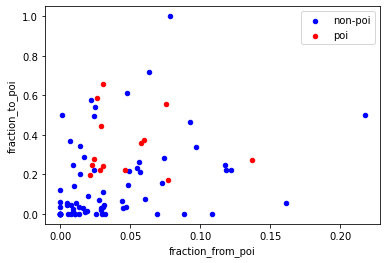

In [188]:
ax = df[df['poi']==False].plot.scatter(x='fraction_from_poi',y='fraction_to_poi',color='blue',label='non-poi')
df[df['poi']==True].plot.scatter(x='fraction_from_poi',y='fraction_to_poi',color='red',label='poi',ax=ax)

In [189]:
feature_list = ['poi','salary','bonus','long_term_incentive','deferred_income','deferral_payments',
               'loan_advances','other','expenses','director_fees','total_payments',
               'exercised_stock_options','restricted_stock','restricted_stock_deferred',
               'total_stock_value','to_messages','from_messages','from_this_person_to_poi',
               'from_poi_to_this_person','shared_receipt_with_poi','fraction_from_poi','fraction_to_poi']

In [190]:
filled_df = df.fillna(value='NaN')
data_dict = filled_df.to_dict(orient='index')

In [191]:
my_dataset = data_dict

In [192]:
my_dataset.keys()

dict_keys(['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HAEDICKE MARK E', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'NOLES JAMES L', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHELBY REX', 'LEMA

In [193]:
!pip install feature_format

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [194]:
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

In [195]:
data = featureFormat(my_dataset,feature_list,sort_keys = True)
data

array([[0.00000000e+00, 2.01955000e+05, 4.17500000e+06, ...,
        1.40700000e+03, 1.61957271e-02, 2.96127563e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.77000000e+02, 0.00000000e+00, ...,
        4.65000000e+02, 6.89045936e-02, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.58403000e+05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [196]:
y , X = targetFeatureSplit(data)

In [197]:
X = np.array(X)
y = np.array(y)

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [200]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((108, 21), (36, 21), (108,), (36,))

# Logicstic

In [201]:
from sklearn.linear_model import LogisticRegression

In [202]:
lr = LogisticRegression(max_iter=1000)

In [203]:
lr.fit(x_train,y_train)

c:\users\91833\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [204]:
lr_yhat = lr.predict(x_test)
lr_yhat

array([0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0.])

In [205]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report

In [206]:
cm = confusion_matrix(y_test,lr_yhat)
cm

array([[27,  8],
       [ 0,  1]], dtype=int64)

In [207]:
print(classification_report(y_test,lr_yhat))

              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87        35
         1.0       0.11      1.00      0.20         1

    accuracy                           0.78        36
   macro avg       0.56      0.89      0.54        36
weighted avg       0.98      0.78      0.85        36



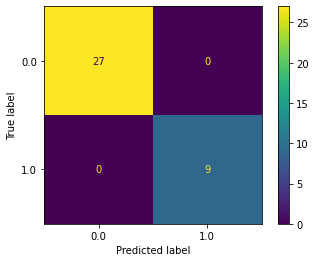

In [208]:
plot_confusion_matrix(lr,x_test,lr_yhat)

In [209]:
accuracy_score(y_test,lr_yhat)

0.7777777777777778

# KNN Classifier

In [210]:
from sklearn.neighbors import KNeighborsClassifier

In [211]:
knn = KNeighborsClassifier()

In [212]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [213]:
knn_yhat = knn.predict(x_test)

In [214]:
knn_yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [215]:
cm = confusion_matrix(y_test,knn_yhat)
cm

array([[35,  0],
       [ 0,  1]], dtype=int64)

In [216]:
print(classification_report(y_test,knn_yhat))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        35
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



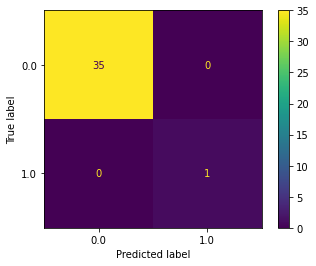

In [217]:
plot_confusion_matrix(knn,x_test,knn_yhat)

In [218]:
accuracy_score(y_test,knn_yhat)

1.0

# Support Vector Machine (SVM)

In [219]:
from sklearn.svm import SVC

In [220]:
model = SVC()

In [221]:
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [222]:
svc_yhat = model.predict(x_test)

In [223]:
svc_yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [224]:
cm = confusion_matrix(y_test,svc_yhat)
cm

array([[35,  0],
       [ 1,  0]], dtype=int64)

In [225]:
print(classification_report(y_test,svc_yhat))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        35
         1.0       0.00      0.00      0.00         1

    accuracy                           0.97        36
   macro avg       0.49      0.50      0.49        36
weighted avg       0.95      0.97      0.96        36



c:\users\91833\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


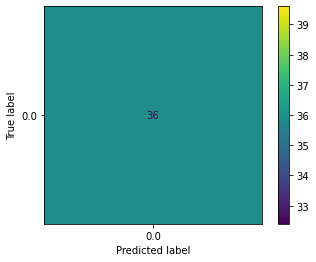

In [226]:
plot_confusion_matrix(model,x_test,svc_yhat)

In [227]:
accuracy_score(y_test,svc_yhat)

0.9722222222222222

## Naive Bayes

In [228]:
from sklearn.naive_bayes import MultinomialNB,ComplementNB,CategoricalNB,GaussianNB,BernoulliNB

### Bernouli

In [229]:
bnb = BernoulliNB()

In [230]:
bnb.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [231]:
bnb_yhat = bnb.predict(x_test)
bnb_yhat

array([1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0.])

In [232]:
cm = confusion_matrix(y_test,bnb_yhat)

In [233]:
cm

array([[19, 16],
       [ 1,  0]], dtype=int64)

In [234]:
print (classification_report(y_test,bnb_yhat))

              precision    recall  f1-score   support

         0.0       0.95      0.54      0.69        35
         1.0       0.00      0.00      0.00         1

    accuracy                           0.53        36
   macro avg       0.47      0.27      0.35        36
weighted avg       0.92      0.53      0.67        36



In [235]:
accuracy_score(y_test,bnb_yhat)

0.5277777777777778

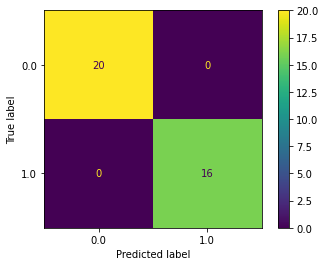

In [236]:
plot_confusion_matrix(bnb,x_test,bnb_yhat)

### Gaussian

In [237]:
gnb = GaussianNB() 

In [238]:
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [239]:
gnb_yhat = gnb.predict(x_test)
gnb_yhat

array([1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [240]:
cm = confusion_matrix(y_test,gnb_yhat)
cm

array([[29,  6],
       [ 0,  1]], dtype=int64)

In [241]:
accuracy_score(y_test,gnb_yhat)

0.8333333333333334

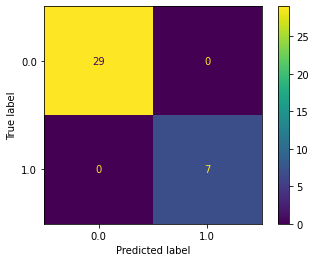

In [242]:
plot_confusion_matrix(gnb,x_test,gnb_yhat)

## Decision Tree

In [243]:
from sklearn.tree import DecisionTreeClassifier

In [244]:
DTC = DecisionTreeClassifier()

In [245]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [246]:
dtc_yhat = DTC.predict(x_test)
dtc_yhat

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [247]:
cm = confusion_matrix(y_test,dtc_yhat)
cm

array([[33,  2],
       [ 1,  0]], dtype=int64)

In [248]:
print(classification_report(y_test,dtc_yhat))

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96        35
         1.0       0.00      0.00      0.00         1

    accuracy                           0.92        36
   macro avg       0.49      0.47      0.48        36
weighted avg       0.94      0.92      0.93        36



In [249]:
importance = DTC.feature_importances_

In [250]:
importance

array([0.        , 0.04654169, 0.        , 0.        , 0.        ,
       0.        , 0.18985133, 0.16559045, 0.        , 0.        ,
       0.        , 0.02051713, 0.        , 0.0652686 , 0.        ,
       0.        , 0.        , 0.        , 0.26317491, 0.        ,
       0.2490559 ])

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.04654
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.18985
Feature: 7, Score: 0.16559
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.02052
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.06527
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.26317
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.24906


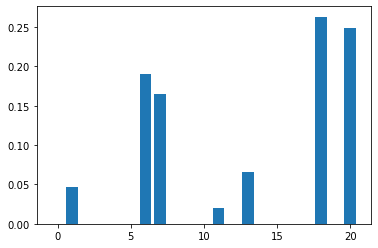

In [251]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))],importance)
plt.show()

In [328]:
### Cross-validation
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

SCALER = [None, StandardScaler()]
SELECTOR__K = [10, 13, 15, 18, 'all']
REDUCER__N_COMPONENTS = [2, 4, 6, 8, 10]

In [329]:
def evaluate_model(grid, X, y, cv):
    nested_score = cross_val_score(grid, X=X, y=y, cv=cv, n_jobs=-1)
    print("Nested f1 score: {}".format(nested_score.mean()))

    grid.fit(X, y)    
    print("Best parameters: {}".format(grid.best_params_))

    cv_accuracy = []
    cv_precision = []
    cv_recall = []
    cv_f1 = []
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        grid.best_estimator_.fit(X_train, y_train)
        pred = grid.best_estimator_.predict(X_test)

        cv_accuracy.append(accuracy_score(y_test, pred))
        cv_precision.append(precision_score(y_test, pred))
        cv_recall.append(recall_score(y_test, pred))
        cv_f1.append(f1_score(y_test, pred))

    print ("Mean Accuracy: {}".format(np.mean(cv_accuracy)))
    print ("Mean Precision: {}".format(np.mean(cv_precision)))
    print ("Mean Recall: {}".format(np.mean(cv_recall)))
    print ("Mean f1: {}".format(np.mean(cv_f1)))

In [330]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [337]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

In [338]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
# from sklearn.preprocessing import StandardScaler
pipe = Pipeline([('scaler',StandardScaler()),
               ('selector',SelectKBest()),
               ('reducer',PCA(random_state=42)),
               ('classifier',GaussianNB())
               ])

In [332]:
pipe = Pipeline([('scaler',StandardScaler()),
                ('selector',SelectKBest()),
                ('reducer',PCA(random_state=42)),
                ('classifier',GaussianNB())
                ])

In [339]:
param_grid = {"scaler":SCALER,
            "selector__k":SELECTOR_K  ,
            'reducer__n_components': REDUCER__N_COMPONENTS}

In [340]:
gnb_grid = GridSearchCV(pipe,param_grid,scoring='f1',cv=sss)
gnb_grid

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.2,
            train_size=None),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selector',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x000002306E665C18>)),
                                       ('reducer',
                                        PCA(copy=True, iterated_power='auto',
                                            n_c...
                                            whiten=False)),
                                       ('classifier',
                                       

In [341]:
evaluate_model(gnb_grid,X,y,sss)

Nested f1 score: 0.366984126984127
Best parameters: {'reducer__n_components': 6, 'scaler': None, 'selector__k': 15}
Mean Accuracy: 0.8793103448275861
Mean Precision: 0.5433333333333333
Mean Recall: 0.325
Mean f1: 0.38


c:\users\91833\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\91833\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [342]:
kbest = gnb_grid.best_estimator_.named_steps['selector']

In [344]:
features_array = np.array(feature_list)
features_array = np.delete(features_array,0)
indices = np.argsort(kbest.scores_)[::-1]
k_features = kbest.get_support().sum()

In [346]:
features = []
for i in range(k_features):
    features.append(features_array[indices[i]])
    
features = features[::-1]
scores = kbest.scores_[indices[range(k_features)]][::-1]

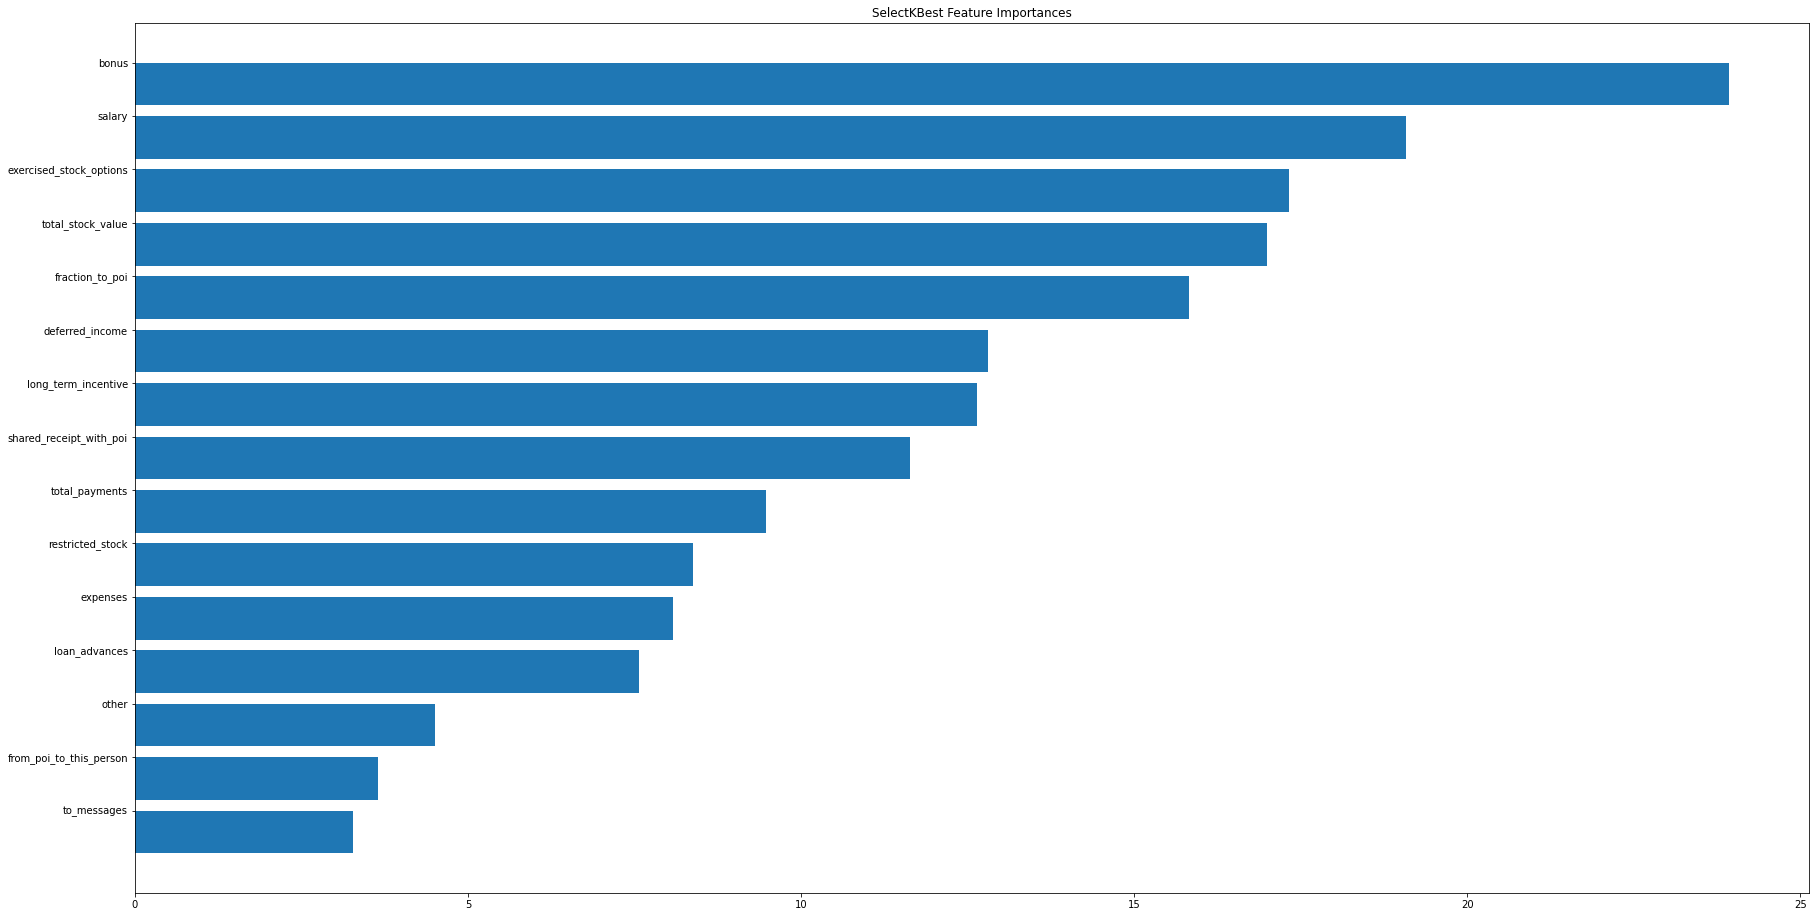

In [347]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,16))
plt.barh(range(k_features),scores)
plt.yticks(np.arange(0.4,k_features),features)
plt.title("SelectKBest Feature Importances")
plt.show()

# Applying SVM for pipeline

In [1]:
from sklearn.svm import SVC

In [2]:
pipe_1 = Pipeline([('scaler',StandardScaler()),
                ('selector',SelectKBest()),
                ('reducer',PCA(random_state=42)),
                ('classifier',SVC())
                ])

NameError: name 'Pipeline' is not defined